# STAT 207 Project 02 - Asteroid Inference Project

Victor Liu and Shawn Zhang

## 1. Introduction

For this project I am using the same dataset (https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset) from Kaggle that I used in the first STAT 207 project containing information regarding numerous asteroids in the solar system that have been discovered by astronomers all over the world. The original data is officially maintained by the Jet Propulsion Laboratory of California Institute of Technology, an organization under NASA, on its database search engine (https://ssd.jpl.nasa.gov/tools/sbdb_query.html) and has been transferred to Kaggle by an astronomy and astrophysics researcher. The Kaggle dataset is generally updated weekly as a result of new information/data gathered regarding any of the asteroids listed so there are numerous versions of the dataset that have been made and will be made in the future. As of the start of this project (3/18/2024), I'm using Version 190 of the data.

The dataset represents a sample, albeit a large one, of all asteroids currently in the solar system which is also the population of interest. Astronomers and astrophysicists would definitely find this dataset useful for doing any research about the various characteristics of asteroids in general, or at least just the ones that have been catalogued. As mentioned in my previous project, these results could be used by astronomers and astrophysicists to better determine and identify potentially hazardous asteroids in the future and warn authorities if necessary. Analysis could be done to find relationship between the many variables listed in the dataset and used to further our understanding of asteroids in the solar system. The reason why I'm using this dataset is because I'm interested in astronomy. 

Some research questions that I want to answer:

- What is the median Earth MOID (Minimum orbit intersection distance, aka closest distance between two osculating orbits of two bodies in space) in this sample? What is a reasonable range of values for the median MOID of the population of all asteroids that are in the solar system?
- What is the relationship between the Apollo (APO)/Amor (AMO) orbital classes (the two largest near earth orbit classes) and pha (potentially hazardous asteroid) status in this dataset? Is there an association between those two variables in the population of all asteroids in the solar system?

The answers to these questions can help astronomers and astrophysicists better identify characteristics of potentially hazardous asteroids as new asteroids are cataloged and information about previously discovered asteroids is updated. The answers could also help humanity better understand some of the astronomical neighbors that exist within our solar system.

In [88]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

sns.set(rc={'figure.figsize':(25, 10)})

## 2. Confidence Interval Analytical Tasks

To state the research question again, I want to know the median Earth MOID of the sample and a reasonable range of values for the median MOID of the population of all asteroids in the solar system.

Before I tackle those questions I'll quickly clean up the dataset for analysis. Since I'm only using the moid for the confidence interval, the cleaning process won't be that complicated.

In [89]:
asteroid = pd.read_csv("asteroids.csv", low_memory=False)
asteroid.head(10)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
5,a0000006,2000006,6 Hebe,6,Hebe,NaN,N,N,5.80,185.180,...,2.191800e-06,1.122100e-05,1.300600e-05,7.392200e-06,3.306700e-09,4.438800e-10,2.875400e-05,2.344500e-06,MBA,0.41032
6,a0000007,2000007,7 Iris,7,Iris,NaN,N,N,5.60,199.830,...,2.582500e-06,2.641200e-05,2.707500e-05,7.014700e-06,2.469500e-09,3.370100e-10,2.662700e-05,1.699400e-06,MBA,0.38128
7,a0000008,2000008,8 Flora,8,Flora,NaN,N,N,6.50,147.491,...,3.240300e-06,2.432000e-05,2.664600e-05,1.209200e-05,2.668100e-09,4.746200e-10,4.018700e-05,1.876500e-06,MBA,0.54186
8,a0000009,2000009,9 Metis,9,Metis,NaN,N,N,6.30,190.000,...,2.007400e-06,2.417000e-05,2.600800e-05,1.036600e-05,3.470200e-09,5.192700e-10,3.870700e-05,2.614600e-06,MBA,0.44895
9,a0000010,2000010,10 Hygiea,10,Hygiea,NaN,N,N,5.50,407.120,...,2.173400e-06,2.855200e-05,3.023700e-05,1.124600e-05,7.699800e-09,5.847400e-10,6.482900e-05,6.724400e-06,MBA,0.53434


In [90]:
len(asteroid)

958524

Assigning the moid column to a new dataframe so it's easier to work with. Also checking to see how many missing values there are for moid.

In [91]:
asteroid1 = asteroid[["moid"]]
asteroid1.isna().sum()

moid    19921
dtype: int64

I dropped 19,921 missing values because they make up only 2.078% of the total sample of 958,524. I do not think that dropping them will greatly impact the results or validity of my analysis and inference.

In [92]:
asteroid1_clean = asteroid1.dropna()

Because we are only looking for the median moid of asteroids in the sample, I don't think it's necessary to drop any observations with values regardless of how extreme they are because the median is resistant to outliers. Assuming the measurements recorded are likely as accurate as possible with the current methods and technology used to measure or calculate them, all these observations should be real, and thus considered in inference, regardless of how extreme they are. I will be using visualizations later but I can just adjust the range of the values displayed as to make the visualization more understandable while keeping those very extreme outliers in the dataset. Some benefits of doing it this way is that I use as many moid observations as possible in my inference and don't lose any more data or reduce the validity of my inference results.

Some limitations in the data include the fact that we may not know the exact values for the moid of some asteroids listed in the dataset as mentioned previously. At the end of the day, many values in the dataset will just be our very best guesses using the best of current technology. Even still, the moids of some asteroids in this dataset may be missing because astronomers and astrophysicists are still in the process of measuring and/or calculating them or because they still can't be determined using current methods and/or technology. Even though the dataset is large, it doesn't contain every identified asteroid which, according to the JPL home website (https://ssd.jpl.nasa.gov), is 1,353,780 as of (3/20/2024) and will continue to increase with time, so it definitely couldn't contain the population of all asteroids in our solar system.

Here's the dataset after cleaning.

In [93]:
asteroid1_clean

,moid
0,1.594780
1,1.234290
2,1.034290
3,1.139480
4,1.095750
...,...
958519,0.861979
958520,0.671242
958521,0.035589
958522,0.893896


Now I can properly answer the first question I originally asked.

Text(0.5, 1.0, 'Histogram of Earth MOIDs in Astronomical Units')

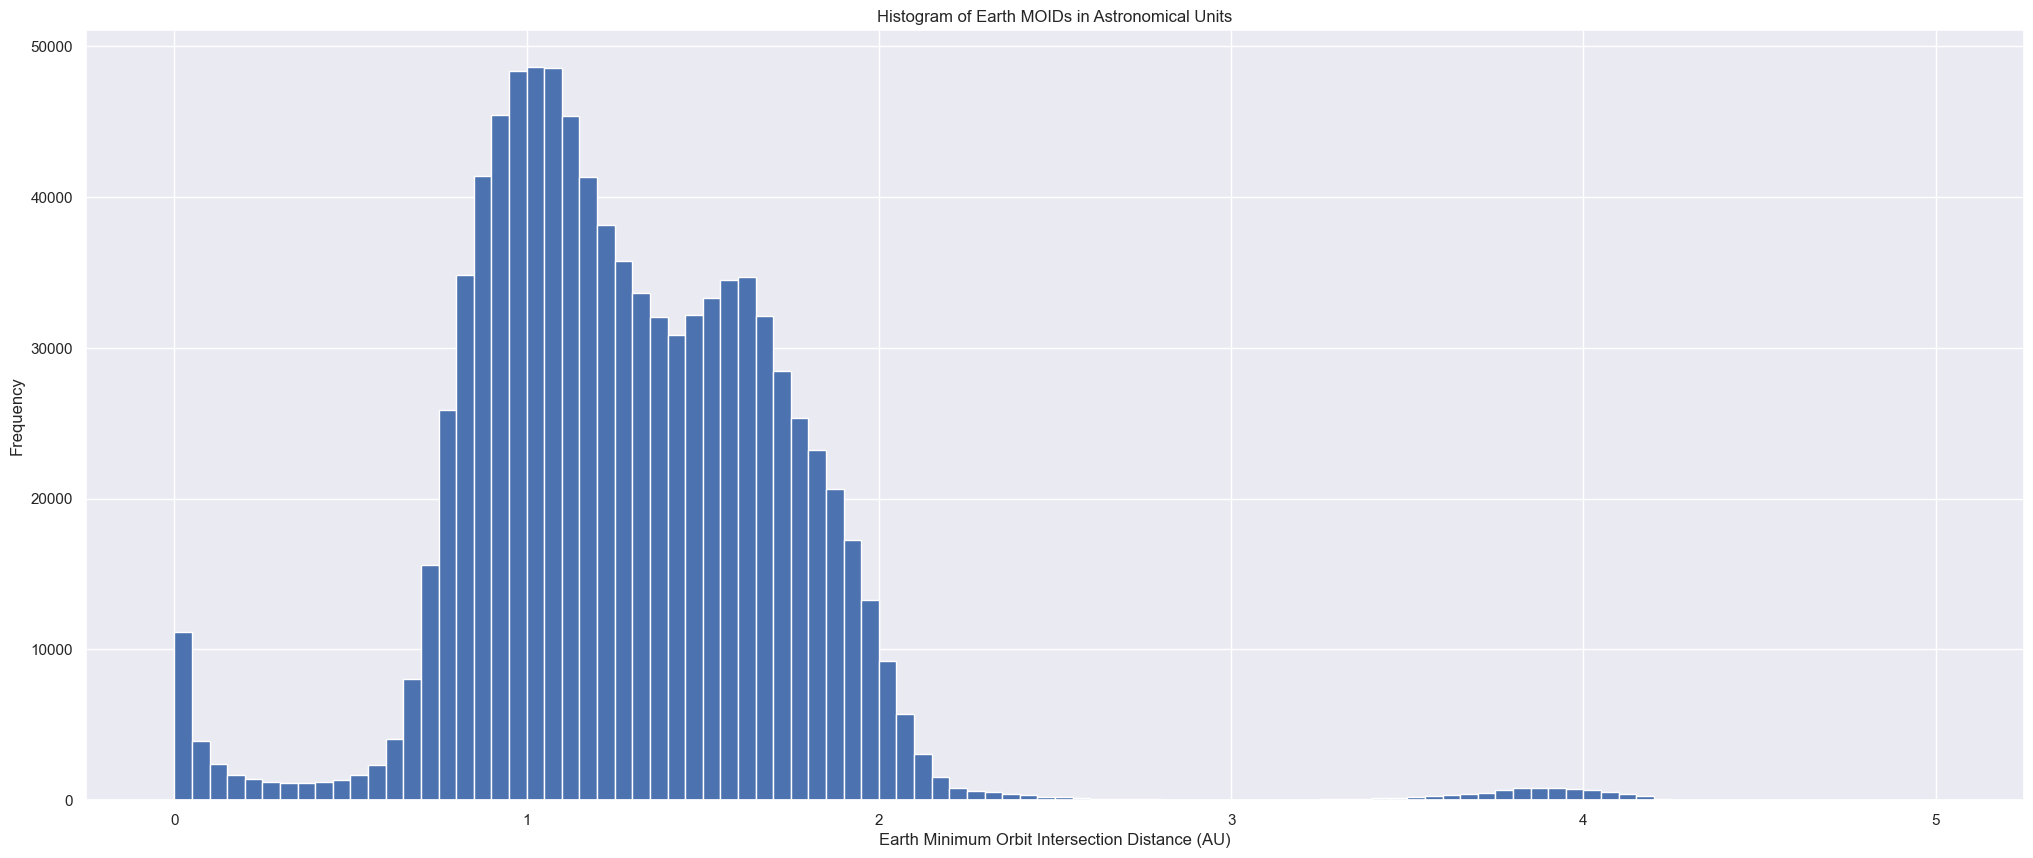

In [95]:
asteroid1_clean["moid"].hist(bins=100, range = [0, 5])
plt.xlabel("Earth Minimum Orbit Intersection Distance (AU)")
plt.ylabel("Frequency")
plt.title("Histogram of Earth MOIDs in Astronomical Units")

To answer my first question, it appears that the median moid of the sample is 1.24 AU. This means that the majority of asteroids in this sample get fairly close to the Earth on an astronomical scale. This value also matches fairly well with what is displayed in the histogram of the variable. Checking the histogram of earth moids, it seems that using median as a measure of center is the way to go because the graph is skewed right. It's also resistant to those extreme outliers in the dataset that I left as I mentioned earlier.

For the second question, I need to construct a confidence interval. I've decided to go with a confidence level of 90%.

To create the sampling distribution in order to get a confidence level, I decided to calculate the sample medians for 5000 samples of size 100 each with replacement.

In [96]:
data = []
for i in range(5000):
    sample = asteroid1_clean.sample(100, replace=True)
    data.append(sample["moid"].median())
sampling_distr1 = pd.DataFrame({"medians":data})
sampling_distr1

,medians
0,1.258705
1,1.342670
2,1.239770
3,1.199895
4,1.322370
...,...
4995,1.285270
4996,1.221315
4997,1.200600
4998,1.221985


Here I'm using a visualization to display the sampling distribution that I'm using to create the confidence interval.

Text(0.5, 1.0, 'Sampling Distribution of Earth MOIDs in Astronomical Units')

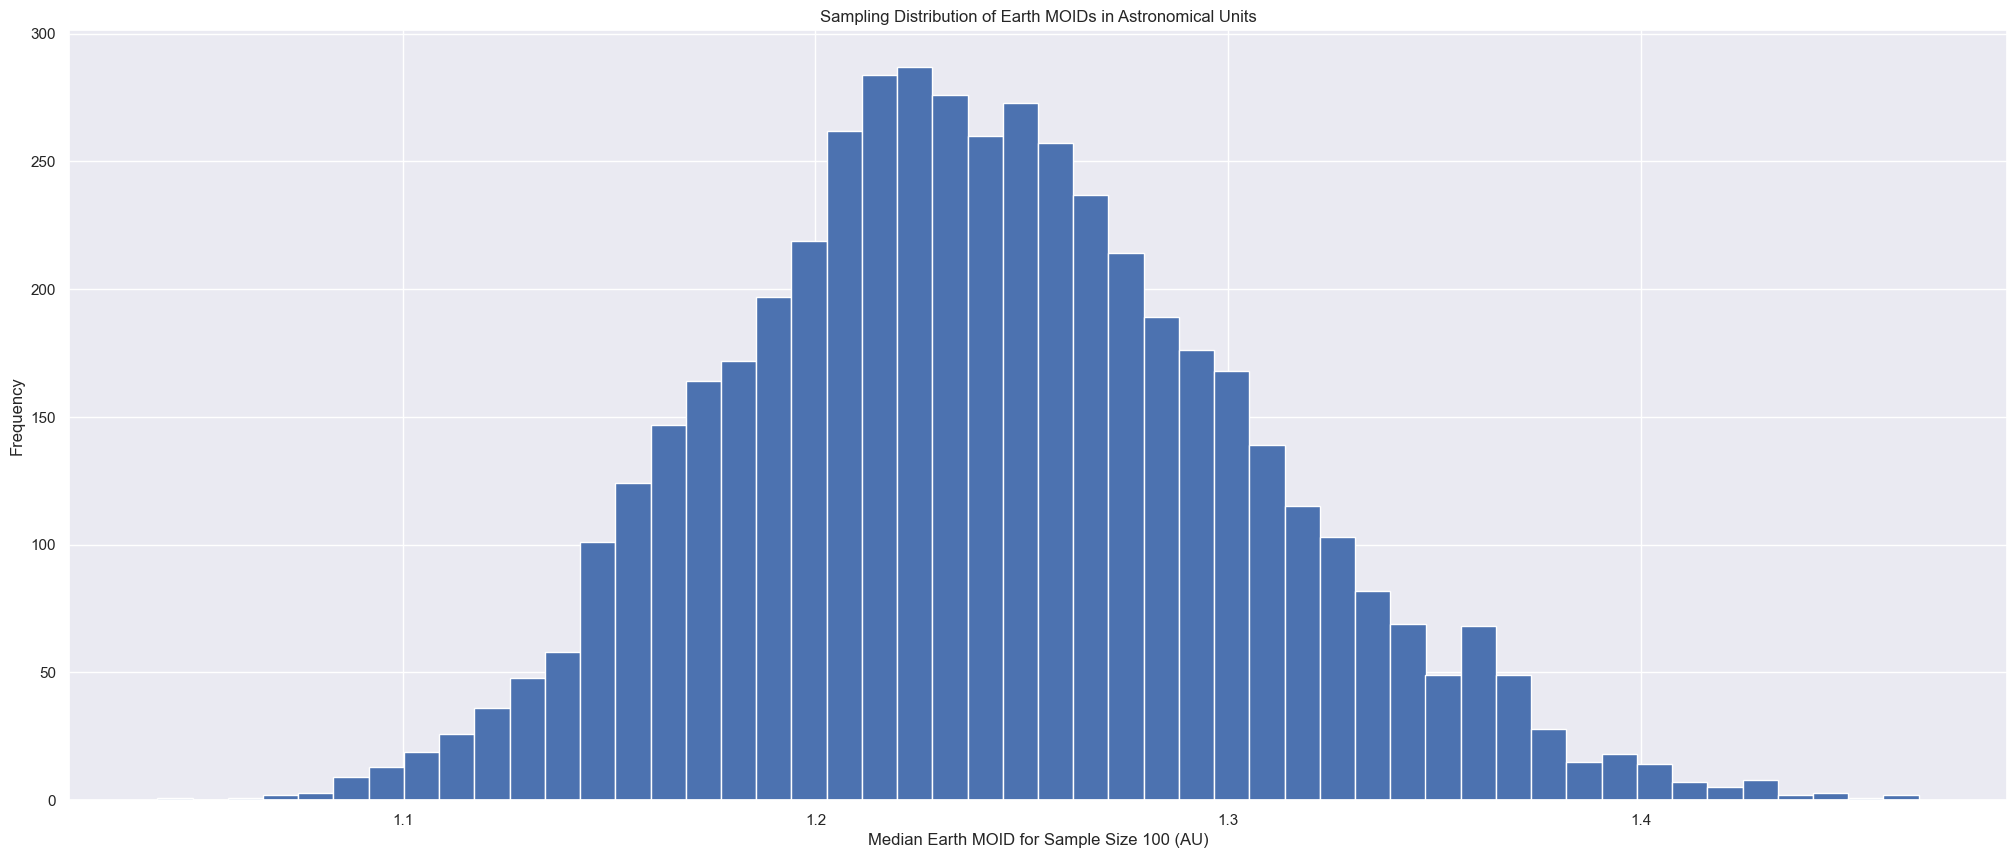

In [97]:
sampling_distr1.hist(bins=50)
plt.xlabel("Median Earth MOID for Sample Size 100 (AU)")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Earth MOIDs in Astronomical Units")

To get the confidence interval from this sampling distribution, I find the 0.05 and 0.95 quantiles of the sampling distribution to get the bounds for the middle 90% of the sample medians.

In [98]:
sampling_distr1.quantile([0.05, 0.95])

,medians
0.05,1.146658
0.95,1.351247


From this sampling distribution, my 90% confidence interval goes from 1.15 AU to 1.35 AU.

This 90% confidence level means that out of 100 confidence intervals generated from sampling distributions that are simulated with the same number of samples and sample size, around 90 of those confidence intervals will contain the true population median moid of all asteroids that are in the solar system. The confidence interval that I got from the data means that I am 90% confident that the true population median moid of all asteroids in the solar system is between 1.15 AU and 1.35 AU.

The approach to answer the first question is very straightfoward and using a sampling distribution to get a confidence interval with a high confidence level helps me get that reasonable range of values that I want for the second question. These help answer my questions as now I know the median moid of all observations with values in the sample which is 1.24 AU and know a reasonable range of values for the median moid of the population of all asteroids in the solar system which is from 1.15 AU to 1.35 AU.

## 3. Hypothesis Testing Analytical Tasks

To state the research question again, I wanted to find the relationship between the Apollo and Amor asteroid orbital class and their pha status and whether there was an association between the two for the population of all asteroids existing in the solar system.

For dataset cleaning I'll check to see there are any missing variables for the two categorical variables.

In [99]:
asteroid2 = asteroid[['pha', 'class']]
asteroid2.isnull().sum()

pha      19921
class        0
dtype: int64

In [100]:
asteroid2_clean = asteroid2.dropna(subset=['pha', 'class'])
asteroid2_clean = asteroid2_clean[(asteroid2_clean["class"] == "APO") | (asteroid2_clean["class"] == "AMO")]
asteroid2_clean

,pha,class
432,N,AMO
718,N,AMO
886,N,AMO
1035,N,AMO
1220,N,AMO
...,...,...
958510,N,APO
958511,N,APO
958512,N,APO
958513,N,APO


I decided to drop the 19,921 missing values in the pha variable because it is only 2.078% of the entire dataset so not much data will be lost. This means that I don't lose much data when sampling for the hypothesis testing and the results will still be valid and applicable to the entire population of asteroids in the solar system.

My two populations will be the Apollo and Amor orbital classes. The data that I'll be using are two separate samples of asteroids.

In [101]:
pha_counts = asteroid2_clean['pha'].value_counts()
class_counts = asteroid2_clean['class'].value_counts()
pha_counts, class_counts

(pha
 N    19257
 Y     1886
 Name: count, dtype: int64,
 class
 APO    12687
 AMO     8456
 Name: count, dtype: int64)

Next I'll get the sample proportions of phas within the two orbit class populations that I mentioned earlier. Proportions is definitely the way to go here because the two variables we're working with are categorical ones so we'll be doing a difference of proportions for the hypothesis test.

In [102]:
apollo = asteroid2_clean[asteroid2_clean["class"] == "APO"]
apo_prop = (apollo["pha"] == "Y").mean()
apo_prop

0.1393552455269173

In [103]:
amor = asteroid2_clean[asteroid2_clean["class"] == "AMO"]
amo_prop = (amor["pha"] == "Y").mean()
amo_prop

0.013954588457899717

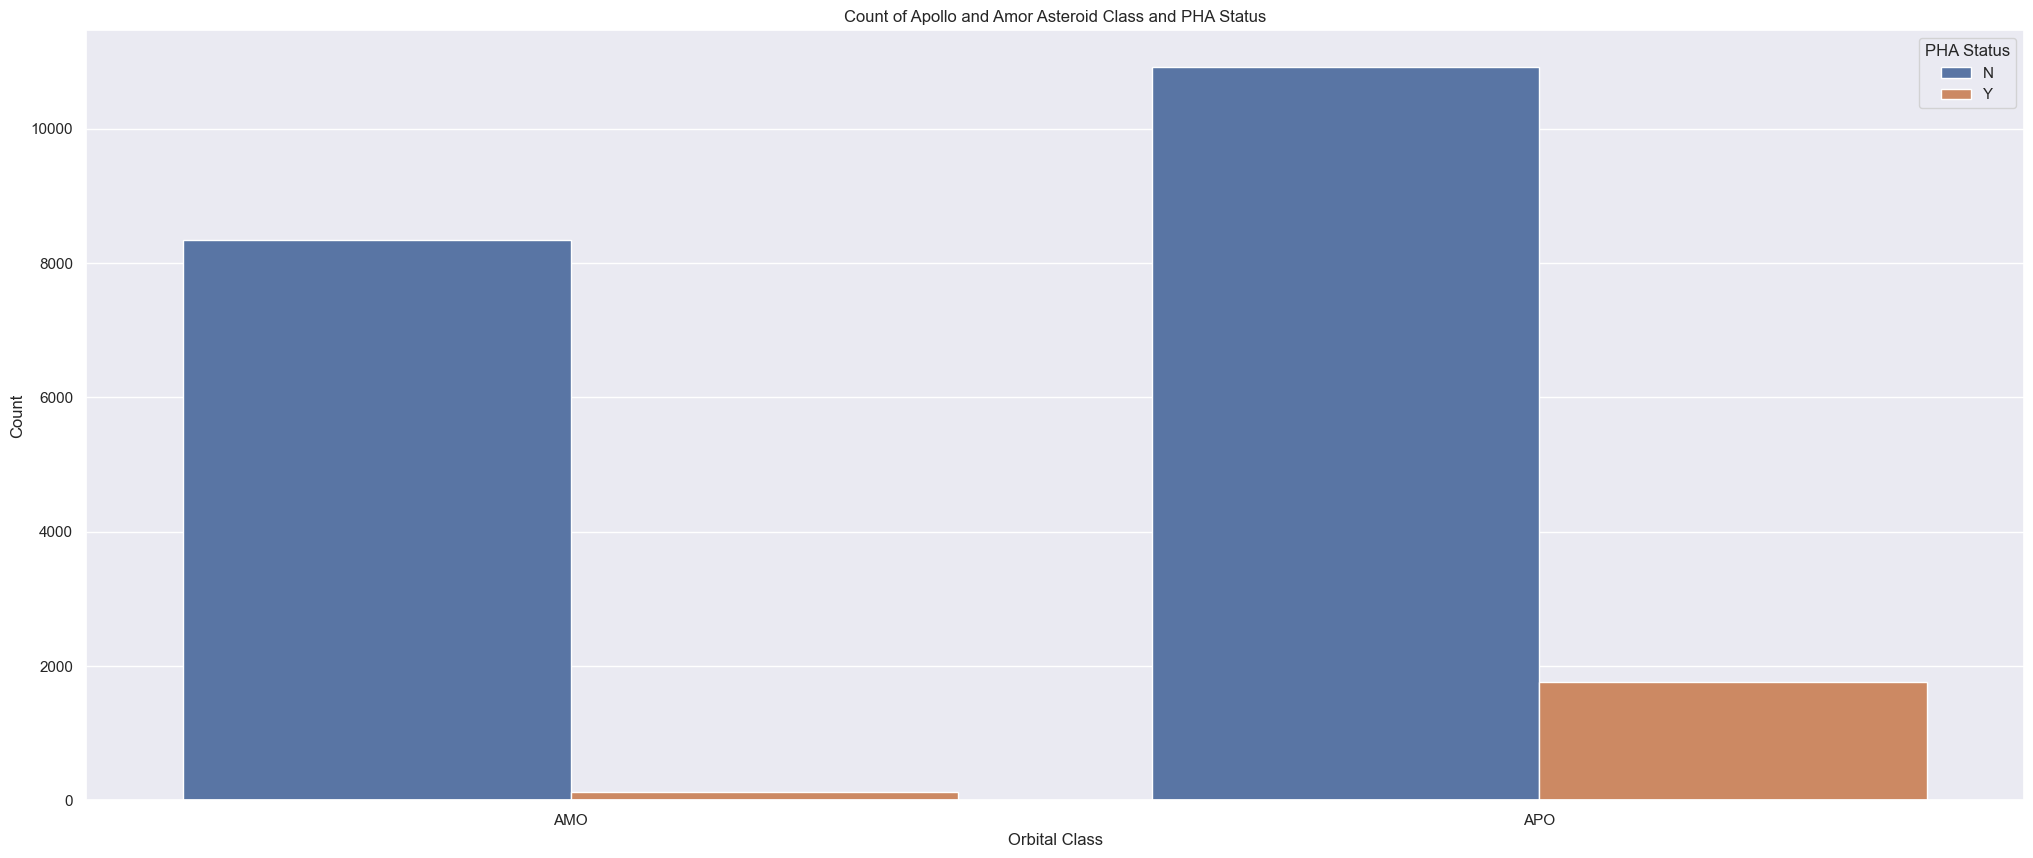

In [104]:
sns.countplot(data=asteroid2_clean, x='class', hue='pha')
plt.title('Count of Apollo and Amor Asteroid Class and PHA Status')
plt.xlabel('Orbital Class')
plt.ylabel('Count')
plt.legend(title='PHA Status')
plt.show()

From the countplot we can see that in both classes, there are far more non-phas than phas. Also from the plot we can see that the proportion of phas within the Apollo orbit class seems to be larger than the proportion of phas within the Amor orbit class. Looking at the actual proportion calculations above the graph, we can see that the two value are quite different, but is the difference up to random chance and negligible or is it significant? We'll see with the hypothesis test below.

## Hypothesis Testing

After cleaning the dataset by dropping rows with missing values, I'm left with a clear dataset that is a representation of our population of interest: all asteroids in the solar system.

In this next part, I will be conducting a hypothesis test. The hypothesis test aims to determine if the proportions of phas are consistent across the Apollo and Amor orbital classes. Specifically, I want to know if the difference in proportions observed is statistically significant or if it could be attributed to natural sample variation.

$p_1$ is the population proportion of Apollo orbital class asteroids that are phas and $p_2$ is the population proportion of Amor orbital class asteroids that are phas.

$H_0: $
 The proportion of PHAs is the same between the populations of Apollo and Amor orbital classes: $p_1$ = $p_2$

$H_a: $
 The proportion of PHAs is not the same between the populations of Apollo and Amor orbital classes: $p_1$ ≠ $p_2$

I'll go with a common significance level of 0.05 for this hypothesis test.

To check the conditions for the test, the samples generated are random and the sample size of each sample is over 30 as verified below.

In [105]:
len(apollo[apollo["pha"] == "Y"])

1768

In [106]:
len(amor[amor["pha"] == "Y"])

118

To adjust the hypothesis to fit the null hypothesis, I'll find the sample difference in proportions from the dataset of the two orbital classes and subtract that value from each of the difference in proportions using sampling to get a sampling distribution centered around a difference in proportions of 0. 

In [107]:
apo_prop-amo_prop

0.1254006570690176

In [108]:
data = []
for i in range(5000):
    sample1 = apollo.sample(len(apollo[apollo["pha"] == "Y"]), replace=True)
    sample2 = amor.sample(len(amor[amor["pha"] == "Y"]), replace=True)
    diff_prop = (sample1['pha'] == 'Y').mean() - (sample2['pha'] == 'Y').mean()
    data.append(diff_prop-0.1254006570690176)
sampling_distr2 = pd.DataFrame({"prop_diff":data})
sampling_distr2

,prop_diff
0,-0.011694
1,0.023355
2,0.008668
3,-0.007169
4,0.004709
...,...
4995,-0.005462
4996,0.024486
4997,0.004699
4998,0.006396


Here I'm using a visualization to display the sampling distribution that I'm using for the hypothesis test.

Text(0.5, 1.0, 'Sampling Distribution of Difference in PHA Proportion between Apollo and Amor Asteroid Orbit Classes')

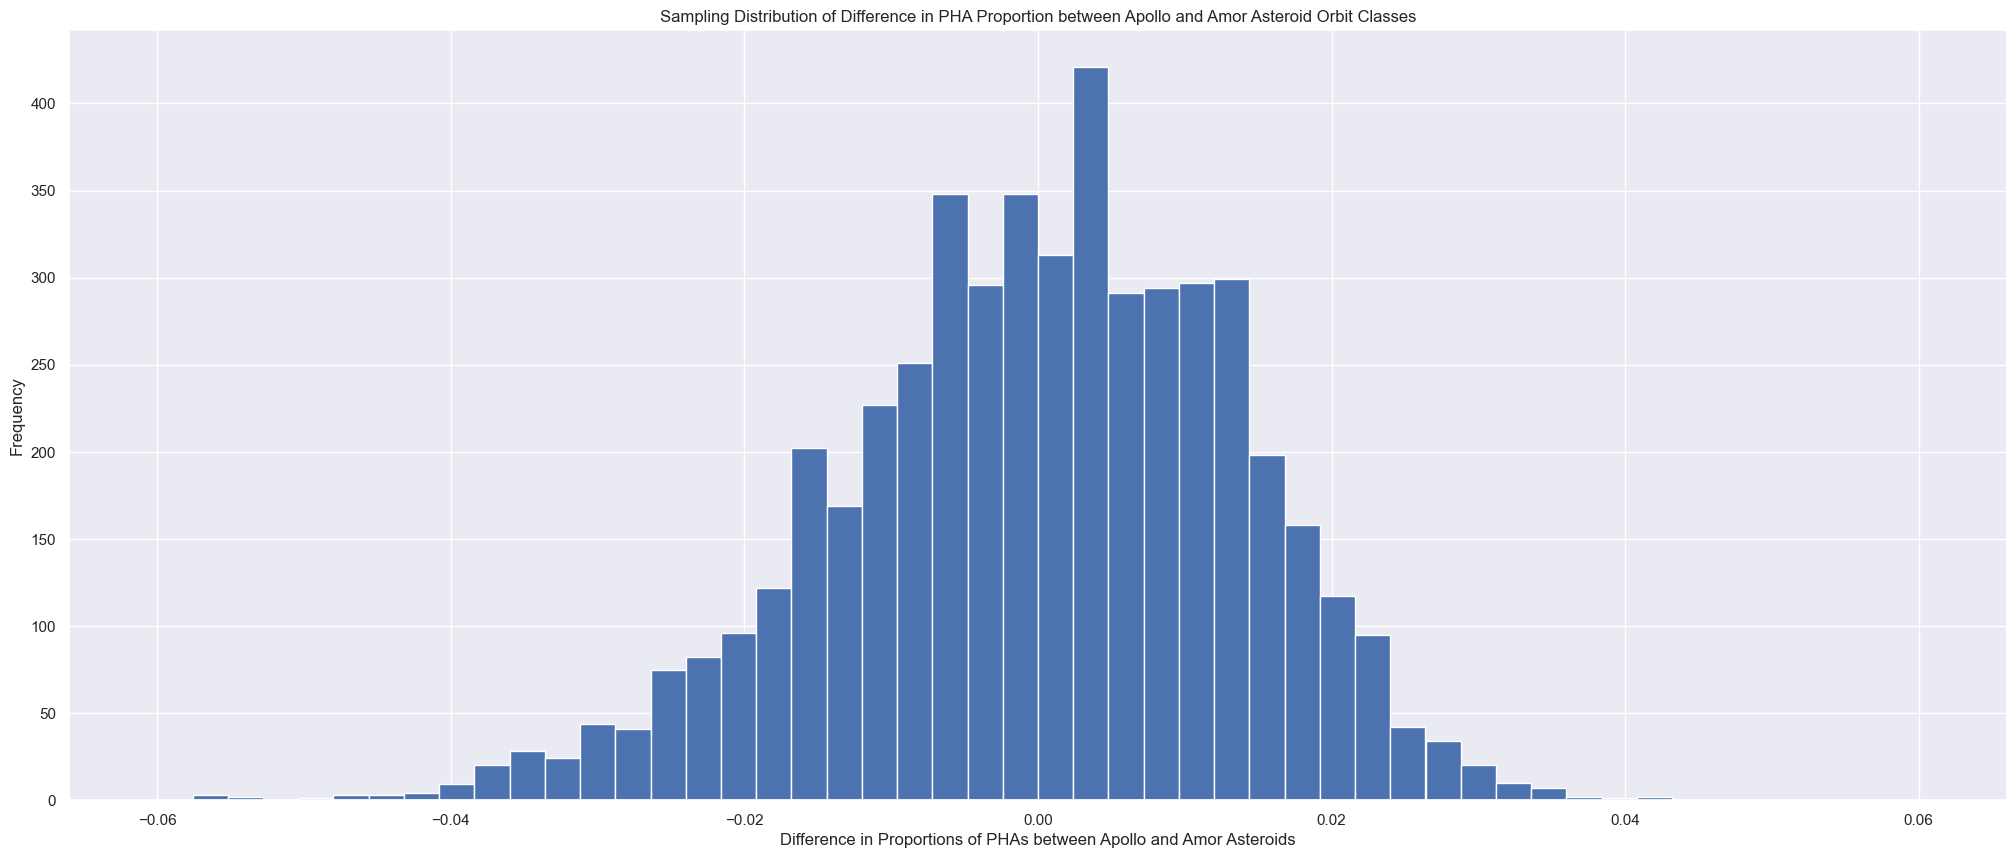

In [109]:
sampling_distr2.hist(bins=50, range = [-0.06, 0.06])
plt.xlabel("Difference in Proportions of PHAs between Apollo and Amor Asteroids")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Difference in PHA Proportion between Apollo and Amor Asteroid Orbit Classes")

Now for the p-value. I'll be finding the proportion of values above and below the positive and negative values, respectively, of the sample difference in proportions of phas between the Apollo and Amor asteroids.

In [110]:
p_val = len(sampling_distr2[(sampling_distr2["prop_diff"] <= -0.1254006570690176) | (sampling_distr2["prop_diff"] >= 0.1254006570690176)])/len(sampling_distr2)
p_val

0.0

The resulting p-value from this test was found to be 0, which isn't unexpected looking at the sampling distribution graph.

The meaning of the alpha or significance level is that it is probability of rejecting the null hypothesis when it is true, also known as Type I error. Considering the p-value of exactly 0, which is much lower than the alpha level of 0.05, we reject the null hypothesis that the difference in proportion of phas between the populations of Apollo and Amor asteroids is the same. This implies that our data does provide sufficient evidence to conclude that there is a statistically significant difference in the proportion of PHAs between the two orbital classes.

## 4. Conclusion

To summarize the project, I took a dataset from Kaggle which was originally maintained by NASA's Jet Propulsion Laboratory and cleaned the data using various methods and criteria before using it for some analysis as well as inference. A relatively small proportion of the data was removed because characteristics about the asteroid were missing. From the first set of questions I found out that the median moid of asteroids in the dataset was 1.24 AU and the 90% confidence interval for the median moid of the population of all asteroids identified by humanity is between 1.15 AU and 1.35 AU. From the second set of questions I discovered that the proportion of phas for both orbit classes was quite small in comparison to the total amount in each orbit class. I also discovered that the population difference in proportions between the two asteroid orbit classes is not zero, meaning that there is a significant difference in the proportion of phas in the Apollo orbit classes and that of the Amor orbit classes.

As for limitations, not all identified asteroids are used in the dataset but I'm assuming that the cleaned dataset of over 900,000 asteroids is fairly representative of all asteroids in the solar system in regards to the characteristics that were used in this project. Another limitation is that we may never truly know how many asteroids are in the solar system exactly because of various difficulties such as in defining the boundaries of the solar system or what constitutes an asteroid, keeping track of the entry and departure of asteroids to or from the solar system with time, or in finding and tracking every last asteroid. The population of asteroids in the solar system should be a definite number, just one that no one might ever know, so the population median of all asteroids in the solar system similarly might not ever be found, meaning that I'll probably have no way of checking to see if my confidence interval is actually accurate. Even still, the population of all asteroids discovered by humanity is constantly increasing, so maybe one day the value of that population parameter may be found. These conclusions could help astronomers and astrophysicists better identify asteroids that are potentially hazardous which are catalogued in the future. In regards to future work, more inference could definitely be done with the multitude of other variables that I didn't use in this project and other people could use the conclusions drawn from this project to create more informed and meaningful research questions to analyze.